# Synphot Example

In this notebook we look at how we can build a model that uses a [synphot](https://synphot.readthedocs.io/en/latest/) `SourceSpectrum` model.

We start by creating a synphot model for blackbody radiation at 6000 K. We plot the SED from 1 to 14,000 Angstroms.

**Note:** that synphot is not installed by default, so users will need to install synphot manually. See instructions [here](https://synphot.readthedocs.io/en/latest/).

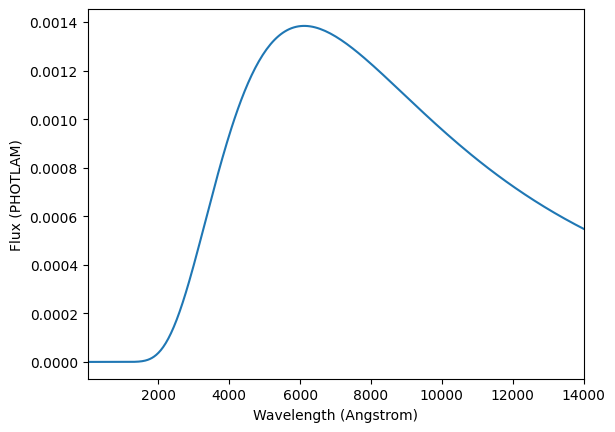

In [1]:
from synphot import SourceSpectrum
from synphot.models import BlackBodyNorm1D

bb_model = SourceSpectrum(BlackBodyNorm1D, temperature=6000)
bb_model.plot(left=1, right=14000)

To use `SourceSpectrum` model in LightCurveLynx, we simply wrap it in an `StaticSEDModel` class using the `from_synphot` method. This class handles generating the SED from the `SourceSpectrum`, converting the units, performing future interpolation, applying effects, and so forth.

We can evaluate the `StaticSEDModel` like any standard LightCurveLynx model.

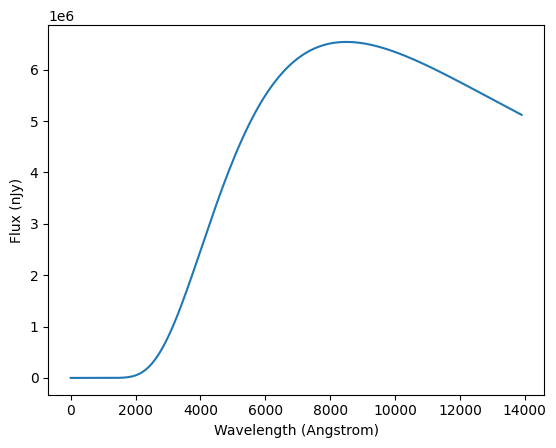

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from lightcurvelynx.models.static_sed_model import StaticSEDModel

# Create the LightCurveLynx model
model1 = StaticSEDModel.from_synphot(bb_model)

# Query the model at specific times and wavelengths.
times = np.array([58000, 58001, 58002])
wavelengths = np.arange(0, 14000, 100)
fluxes = model1.evaluate_sed(times, wavelengths)

# Plot the SED at the first time step.
plt.plot(wavelengths, fluxes[0, :])
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux (nJy)")
plt.show()

We can create more complex models that include effects, such as redshift or dust extinction. Here we set the redshift to 2.5 and can observe how this shifts the SED in the red direction.

Note that although the `SourceSpectrum` can include redshift effect itself, we do not allow objects with `z` > 0.0. All static `StaticSEDModel` models are defined in the rest frame, so that we can consistently apply redshift. This means that the incoming model must have `z`=0, but can have redshift applied via the `redshift` parameter.

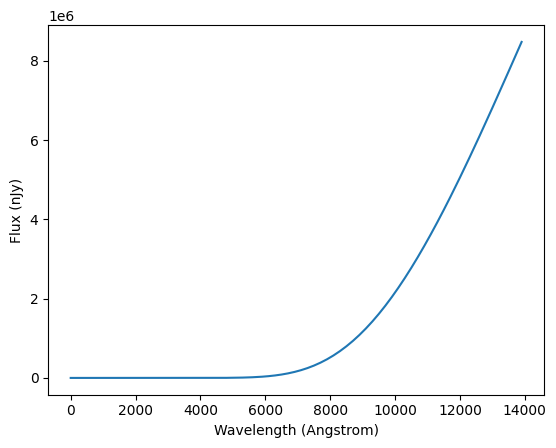

In [3]:
# Create the LightCurveLynx model with a high redshift
model2 = StaticSEDModel.from_synphot(bb_model, redshift=2.5, t0=0.0)

# Query the model at specific times and wavelengths.
fluxes = model2.evaluate_sed(times, wavelengths)

# Plot the SED at the first time step.
plt.plot(wavelengths, fluxes[0, :])
plt.xlabel("Wavelength (Angstrom)")
plt.ylabel("Flux (nJy)")
plt.show()